In [1]:
%matplotlib inline
from __future__ import absolute_import, division, print_function

import pandas as pd
import numpy as np
import json
import os
if os.path.isfile("config.json"):
    with open("config.json", "r") as f:
        config = json.load(f)
else:
    print("Please run setup.py in this directory before running any .ipynb's.")

from utils.bags import *

config

{u'catkin_ws_dir': u'/home/schmrlng/catkin_ws',
 u'data_dir': u'/data/trafficweaving',
 u'feature_extraction_dict': u'slim',
 u'models_dir': u'/data/trafficweaving/models'}

In [2]:
extract = True
array_name = "trajectories_" + config["feature_extraction_dict"]
base_filename = os.path.join(config["data_dir"], array_name)

bagfiles = os.path.join(config["data_dir"], "human_human_traffic_weaving_rosbags/*/*.bag")
extract_dict = feature_extraction_dicts[config["feature_extraction_dict"]]
if extract:
    all_bags = extract_all_bags(bagfiles, extract_dict, .1)
    all_bags.to_pickle(base_filename + ".pkl")

all_bags = pd.read_pickle(base_filename + ".pkl")
save_as_npz_and_hdf5(base_filename, bag_dataframe_to_3d_numpy(all_bags, extract_dict))
all_bags_np = np.load(base_filename + ".npz")

bagfile (/data/trafficweaving/human_human_traffic_weaving_rosbags/01/15:48:04_29_0_2_2_3.bag) has checks [0.49478609915278376, 0.18869361983666974, 0.26841150886987708, 6.1693151750435877] above thresholds
bagfile (/data/trafficweaving/human_human_traffic_weaving_rosbags/01/15:52:57_29_1_0_3_5.bag) has checks [0.60724504332156581, 3.9863435091263915, 1.5873800396819657, 5.6828288143438082] above thresholds
bagfile (/data/trafficweaving/human_human_traffic_weaving_rosbags/01/15:49:38_29_1_0_3_3.bag) has checks [0.10944278449283021, 0.12978431857646811, 0.67940365920842771, 5.5389883658853778] above thresholds
bagfile (/data/trafficweaving/human_human_traffic_weaving_rosbags/01/15:50:18_29_1_0_1_3.bag) has checks [0.78094966489844941, 3.847870434067032, 0.1112316781531501, 0.11921320350944503] above thresholds
bagfile (/data/trafficweaving/human_human_traffic_weaving_rosbags/01/15:48:42_29_0_0_3_3.bag) has checks [0.17678252679862161, 0.17210503677973191, 1.0531513493417282, 1.8630761216

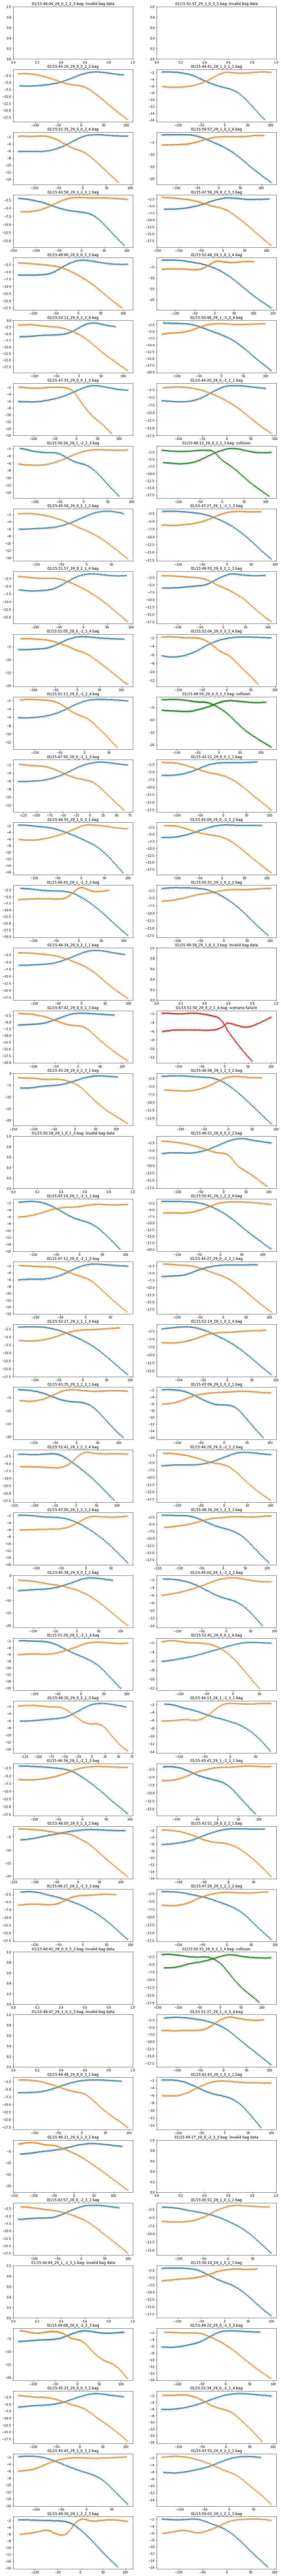

In [3]:
view_all_bags(os.path.join(config["data_dir"], "human_human_traffic_weaving_rosbags/01/*.bag"))